## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0082453	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9884582	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9686517	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9516842	total: 60ms	remaining: 14.9s
4:	learn: 0.9363777	total: 60.9ms	remaining: 12.1s
5:	learn: 0.9221812	total: 62ms	remaining: 10.3s
6:	learn: 0.9047760	total: 63ms	remaining: 8.94s
7:	learn: 0.8880934	total: 64ms	remaining: 7.93s
8:	learn: 0.8724981	total: 64.9ms	remaining: 7.15s
9:	learn: 0.8559060	total: 65.8ms	remaining: 6.52s
10:	learn: 0.8398231	total: 66.7ms	remaining: 5.99s
11:	learn: 0.8248232	total: 67.5ms	remaining: 5.55s
12:	learn: 0.8097897	total: 68.4ms	remaining: 5.19s
13:	learn: 0.7946397	total: 69.3ms	remaining: 4.88s
14:	learn: 0.7810132	total: 70.1ms	remaining: 4.61s
15:	learn: 0.7670891	total: 70.9ms	remaining: 4.36s
16:	learn: 0.7554336	total: 71.7ms	remaining: 4.14s
17:	learn: 0.7426769	total: 72.5ms	remaining: 3.95s
18:	learn: 0.7299438	total: 73.2ms	remaining: 3.78s


62:	learn: 0.4252308	total: 110ms	remaining: 1.63s
63:	learn: 0.4203490	total: 111ms	remaining: 1.62s
64:	learn: 0.4164353	total: 112ms	remaining: 1.6s
65:	learn: 0.4129905	total: 112ms	remaining: 1.59s
66:	learn: 0.4092583	total: 113ms	remaining: 1.57s
67:	learn: 0.4053081	total: 114ms	remaining: 1.56s
68:	learn: 0.4025261	total: 115ms	remaining: 1.55s
69:	learn: 0.3996884	total: 116ms	remaining: 1.54s
70:	learn: 0.3965714	total: 116ms	remaining: 1.52s
71:	learn: 0.3927719	total: 117ms	remaining: 1.51s
72:	learn: 0.3898604	total: 118ms	remaining: 1.5s
73:	learn: 0.3866009	total: 119ms	remaining: 1.49s
74:	learn: 0.3834418	total: 120ms	remaining: 1.48s
75:	learn: 0.3806425	total: 121ms	remaining: 1.47s
76:	learn: 0.3777104	total: 121ms	remaining: 1.46s
77:	learn: 0.3746576	total: 122ms	remaining: 1.45s
78:	learn: 0.3726246	total: 123ms	remaining: 1.44s
79:	learn: 0.3700370	total: 124ms	remaining: 1.43s
80:	learn: 0.3671645	total: 125ms	remaining: 1.42s
81:	learn: 0.3639489	total: 126ms

159:	learn: 0.2560003	total: 192ms	remaining: 1.01s
160:	learn: 0.2548302	total: 193ms	remaining: 1s
161:	learn: 0.2539541	total: 194ms	remaining: 1s
162:	learn: 0.2534367	total: 195ms	remaining: 999ms
163:	learn: 0.2526391	total: 196ms	remaining: 997ms
164:	learn: 0.2519534	total: 196ms	remaining: 993ms
165:	learn: 0.2515364	total: 197ms	remaining: 990ms
166:	learn: 0.2506281	total: 198ms	remaining: 986ms
167:	learn: 0.2499607	total: 199ms	remaining: 983ms
168:	learn: 0.2493928	total: 199ms	remaining: 981ms
169:	learn: 0.2485308	total: 200ms	remaining: 978ms
170:	learn: 0.2477807	total: 201ms	remaining: 976ms
171:	learn: 0.2468132	total: 202ms	remaining: 974ms
172:	learn: 0.2460206	total: 203ms	remaining: 972ms
173:	learn: 0.2453348	total: 204ms	remaining: 969ms
174:	learn: 0.2446265	total: 205ms	remaining: 966ms
175:	learn: 0.2438583	total: 206ms	remaining: 963ms
176:	learn: 0.2427514	total: 207ms	remaining: 961ms
177:	learn: 0.2419528	total: 207ms	remaining: 958ms
178:	learn: 0.2413

287:	learn: 0.1853746	total: 301ms	remaining: 744ms
288:	learn: 0.1849229	total: 302ms	remaining: 743ms
289:	learn: 0.1844683	total: 303ms	remaining: 741ms
290:	learn: 0.1841891	total: 304ms	remaining: 740ms
291:	learn: 0.1839782	total: 305ms	remaining: 739ms
292:	learn: 0.1834249	total: 306ms	remaining: 737ms
293:	learn: 0.1828161	total: 306ms	remaining: 736ms
294:	learn: 0.1823434	total: 307ms	remaining: 734ms
295:	learn: 0.1820619	total: 308ms	remaining: 733ms
296:	learn: 0.1818012	total: 309ms	remaining: 731ms
297:	learn: 0.1816113	total: 310ms	remaining: 729ms
298:	learn: 0.1814362	total: 310ms	remaining: 728ms
299:	learn: 0.1808972	total: 311ms	remaining: 726ms
300:	learn: 0.1806752	total: 312ms	remaining: 725ms
301:	learn: 0.1803757	total: 313ms	remaining: 723ms
302:	learn: 0.1799187	total: 314ms	remaining: 722ms
303:	learn: 0.1795146	total: 315ms	remaining: 720ms
304:	learn: 0.1790590	total: 316ms	remaining: 719ms
305:	learn: 0.1786604	total: 316ms	remaining: 717ms
306:	learn: 

378:	learn: 0.1592597	total: 382ms	remaining: 626ms
379:	learn: 0.1592107	total: 383ms	remaining: 625ms
380:	learn: 0.1588809	total: 384ms	remaining: 624ms
381:	learn: 0.1588426	total: 385ms	remaining: 623ms
382:	learn: 0.1586467	total: 386ms	remaining: 621ms
383:	learn: 0.1581907	total: 387ms	remaining: 620ms
384:	learn: 0.1581678	total: 388ms	remaining: 619ms
385:	learn: 0.1577815	total: 388ms	remaining: 618ms
386:	learn: 0.1573856	total: 389ms	remaining: 616ms
387:	learn: 0.1572400	total: 390ms	remaining: 615ms
388:	learn: 0.1572113	total: 391ms	remaining: 614ms
389:	learn: 0.1566794	total: 392ms	remaining: 612ms
390:	learn: 0.1566514	total: 392ms	remaining: 611ms
391:	learn: 0.1562467	total: 393ms	remaining: 610ms
392:	learn: 0.1562213	total: 394ms	remaining: 609ms
393:	learn: 0.1561960	total: 395ms	remaining: 607ms
394:	learn: 0.1558014	total: 396ms	remaining: 606ms
395:	learn: 0.1555480	total: 397ms	remaining: 605ms
396:	learn: 0.1555156	total: 398ms	remaining: 604ms
397:	learn: 

503:	learn: 0.1315554	total: 490ms	remaining: 482ms
504:	learn: 0.1313501	total: 491ms	remaining: 481ms
505:	learn: 0.1311159	total: 492ms	remaining: 481ms
506:	learn: 0.1309646	total: 494ms	remaining: 480ms
507:	learn: 0.1305879	total: 495ms	remaining: 479ms
508:	learn: 0.1304008	total: 495ms	remaining: 478ms
509:	learn: 0.1303863	total: 496ms	remaining: 477ms
510:	learn: 0.1303671	total: 497ms	remaining: 476ms
511:	learn: 0.1300923	total: 498ms	remaining: 475ms
512:	learn: 0.1297655	total: 499ms	remaining: 473ms
513:	learn: 0.1295605	total: 500ms	remaining: 472ms
514:	learn: 0.1292772	total: 501ms	remaining: 471ms
515:	learn: 0.1291067	total: 501ms	remaining: 470ms
516:	learn: 0.1287695	total: 502ms	remaining: 469ms
517:	learn: 0.1285421	total: 503ms	remaining: 468ms
518:	learn: 0.1283557	total: 504ms	remaining: 467ms
519:	learn: 0.1281669	total: 505ms	remaining: 466ms
520:	learn: 0.1281416	total: 506ms	remaining: 465ms
521:	learn: 0.1279794	total: 507ms	remaining: 464ms
522:	learn: 

596:	learn: 0.1136602	total: 571ms	remaining: 385ms
597:	learn: 0.1136053	total: 572ms	remaining: 385ms
598:	learn: 0.1134709	total: 573ms	remaining: 383ms
599:	learn: 0.1132929	total: 574ms	remaining: 382ms
600:	learn: 0.1132402	total: 574ms	remaining: 381ms
601:	learn: 0.1130771	total: 575ms	remaining: 380ms
602:	learn: 0.1128498	total: 576ms	remaining: 379ms
603:	learn: 0.1126504	total: 577ms	remaining: 378ms
604:	learn: 0.1124281	total: 577ms	remaining: 377ms
605:	learn: 0.1121094	total: 578ms	remaining: 376ms
606:	learn: 0.1118292	total: 579ms	remaining: 375ms
607:	learn: 0.1116647	total: 580ms	remaining: 374ms
608:	learn: 0.1115150	total: 581ms	remaining: 373ms
609:	learn: 0.1113144	total: 582ms	remaining: 372ms
610:	learn: 0.1110708	total: 582ms	remaining: 371ms
611:	learn: 0.1109166	total: 583ms	remaining: 370ms
612:	learn: 0.1108667	total: 584ms	remaining: 369ms
613:	learn: 0.1107653	total: 585ms	remaining: 368ms
614:	learn: 0.1105397	total: 586ms	remaining: 367ms
615:	learn: 

726:	learn: 0.0938356	total: 680ms	remaining: 255ms
727:	learn: 0.0937015	total: 681ms	remaining: 254ms
728:	learn: 0.0936079	total: 682ms	remaining: 253ms
729:	learn: 0.0934566	total: 683ms	remaining: 252ms
730:	learn: 0.0932584	total: 683ms	remaining: 251ms
731:	learn: 0.0931064	total: 684ms	remaining: 251ms
732:	learn: 0.0930126	total: 685ms	remaining: 250ms
733:	learn: 0.0929855	total: 686ms	remaining: 249ms
734:	learn: 0.0929679	total: 687ms	remaining: 248ms
735:	learn: 0.0928292	total: 688ms	remaining: 247ms
736:	learn: 0.0926855	total: 689ms	remaining: 246ms
737:	learn: 0.0925211	total: 689ms	remaining: 245ms
738:	learn: 0.0923881	total: 690ms	remaining: 244ms
739:	learn: 0.0922955	total: 691ms	remaining: 243ms
740:	learn: 0.0921630	total: 692ms	remaining: 242ms
741:	learn: 0.0919843	total: 693ms	remaining: 241ms
742:	learn: 0.0918926	total: 693ms	remaining: 240ms
743:	learn: 0.0917582	total: 694ms	remaining: 239ms
744:	learn: 0.0915770	total: 696ms	remaining: 238ms
745:	learn: 

824:	learn: 0.0817512	total: 761ms	remaining: 161ms
825:	learn: 0.0816076	total: 762ms	remaining: 161ms
826:	learn: 0.0815761	total: 763ms	remaining: 160ms
827:	learn: 0.0814293	total: 764ms	remaining: 159ms
828:	learn: 0.0813017	total: 765ms	remaining: 158ms
829:	learn: 0.0812065	total: 766ms	remaining: 157ms
830:	learn: 0.0810908	total: 766ms	remaining: 156ms
831:	learn: 0.0809722	total: 767ms	remaining: 155ms
832:	learn: 0.0807821	total: 768ms	remaining: 154ms
833:	learn: 0.0806564	total: 769ms	remaining: 153ms
834:	learn: 0.0805625	total: 770ms	remaining: 152ms
835:	learn: 0.0804776	total: 771ms	remaining: 151ms
836:	learn: 0.0803355	total: 771ms	remaining: 150ms
837:	learn: 0.0802107	total: 772ms	remaining: 149ms
838:	learn: 0.0801227	total: 773ms	remaining: 148ms
839:	learn: 0.0800072	total: 774ms	remaining: 147ms
840:	learn: 0.0798609	total: 775ms	remaining: 146ms
841:	learn: 0.0797230	total: 776ms	remaining: 146ms
842:	learn: 0.0796621	total: 776ms	remaining: 145ms
843:	learn: 

956:	learn: 0.0687162	total: 870ms	remaining: 39.1ms
957:	learn: 0.0685555	total: 871ms	remaining: 38.2ms
958:	learn: 0.0684196	total: 872ms	remaining: 37.3ms
959:	learn: 0.0683533	total: 873ms	remaining: 36.4ms
960:	learn: 0.0681916	total: 874ms	remaining: 35.5ms
961:	learn: 0.0681264	total: 875ms	remaining: 34.5ms
962:	learn: 0.0680452	total: 875ms	remaining: 33.6ms
963:	learn: 0.0678743	total: 877ms	remaining: 32.7ms
964:	learn: 0.0677389	total: 878ms	remaining: 31.8ms
965:	learn: 0.0676349	total: 878ms	remaining: 30.9ms
966:	learn: 0.0675023	total: 879ms	remaining: 30ms
967:	learn: 0.0673847	total: 880ms	remaining: 29.1ms
968:	learn: 0.0673175	total: 881ms	remaining: 28.2ms
969:	learn: 0.0672577	total: 882ms	remaining: 27.3ms
970:	learn: 0.0672131	total: 882ms	remaining: 26.4ms
971:	learn: 0.0671840	total: 884ms	remaining: 25.5ms
972:	learn: 0.0671597	total: 885ms	remaining: 24.5ms
973:	learn: 0.0670585	total: 885ms	remaining: 23.6ms
974:	learn: 0.0669176	total: 886ms	remaining: 22

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

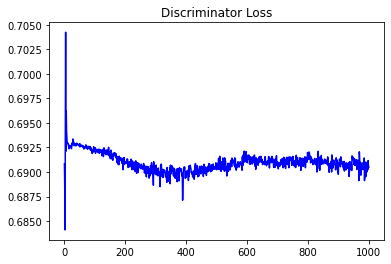

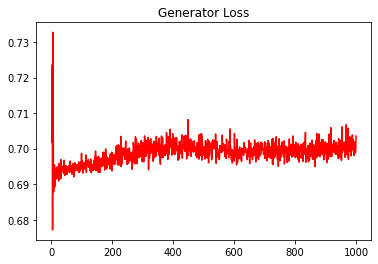

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.145974705606716


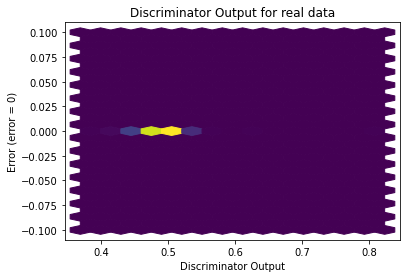

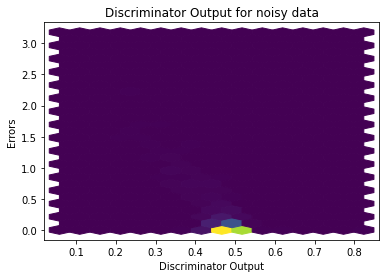

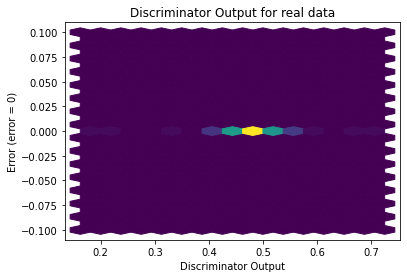

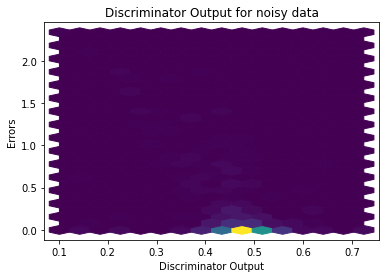

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


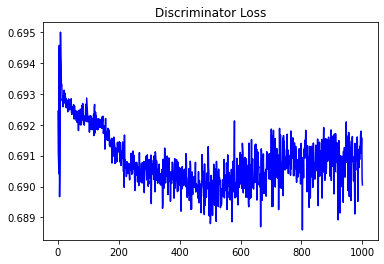

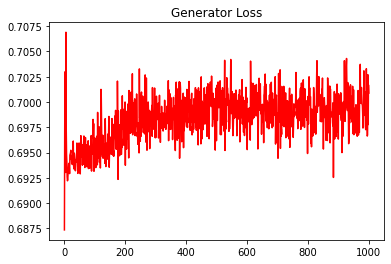

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13244403729889198


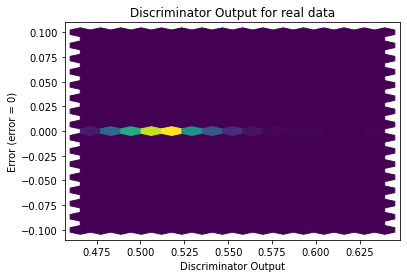

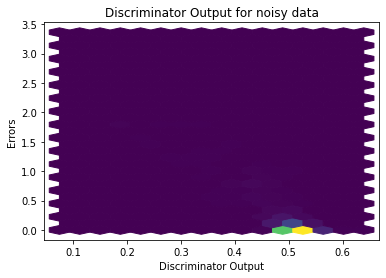

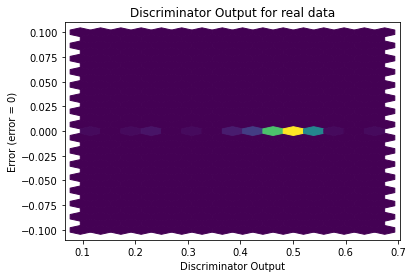

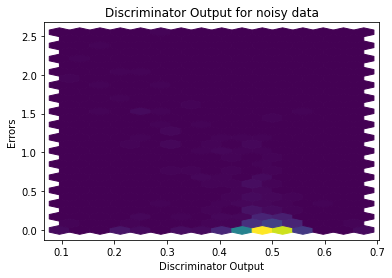

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9481]], requires_grad=True)
